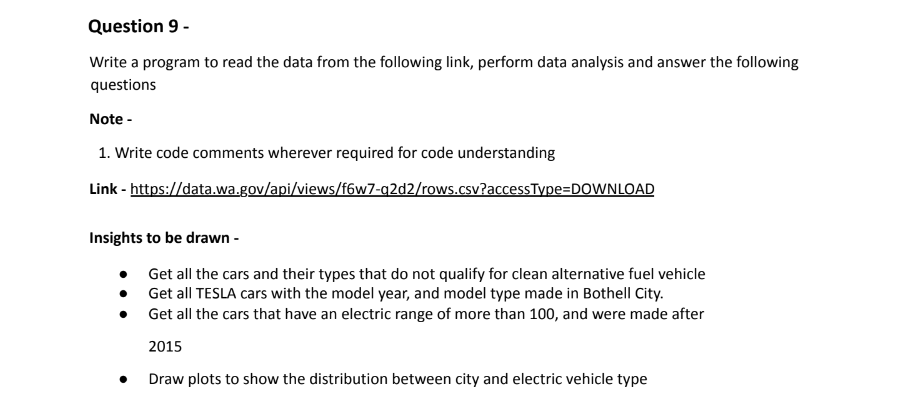

Let's Import Libraries First

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's Import the downloaded Dataset

In [2]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

# 1) Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
df.shape

(130443, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [6]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [7]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

Let's Try To visually see the percentage and number of each category of df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']

<AxesSubplot:title={'center':'CAFV Or Not'}, ylabel='Clean Alternative Fuel Vehicle (CAFV) Eligibility'>

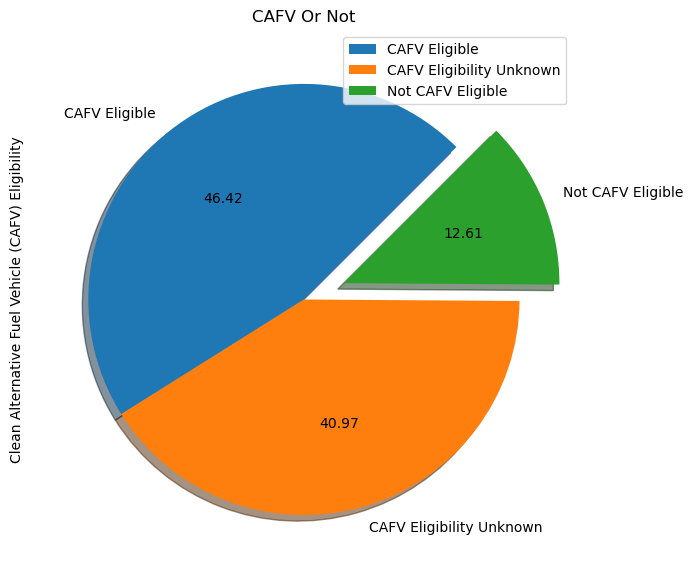

In [15]:
my_lables = ['CAFV Eligible', 'CAFV Eligibility Unknown', 'Not CAFV Eligible']

df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot.pie(startangle=45, explode=(0,0,0.2), legend=True, shadow=True, title='CAFV Or Not', autopct='%.2f', figsize=(7,7), labels=my_lables)

c:\Users\OmGusain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


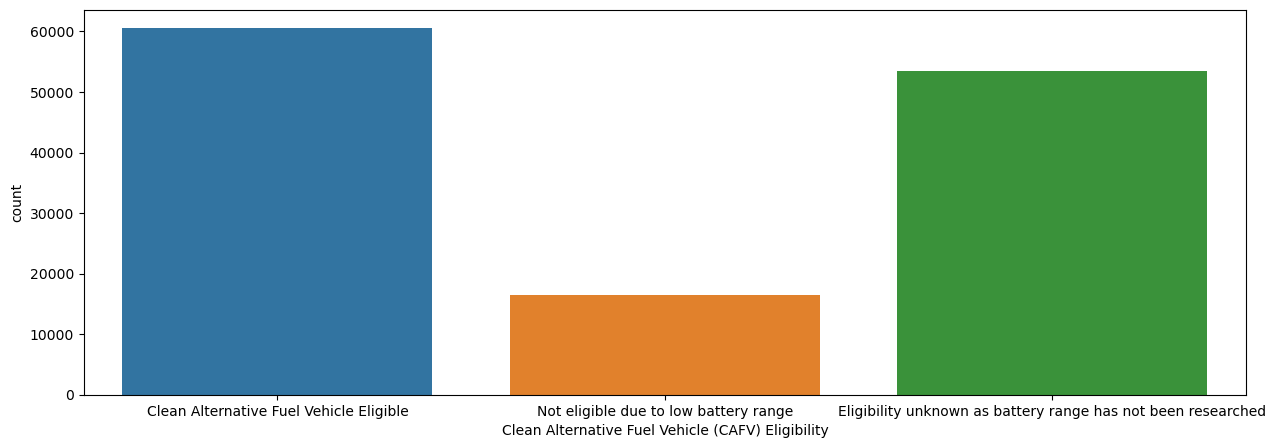

In [24]:
plt.figure(figsize=(15, 5))
sns.countplot(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
plt.show()

Now, let's get all the data of cars that are not eligible

In [27]:
df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Not eligible due to low battery range'].head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
6,3FA6P0PU1G,Thurston,Tumwater,WA,98501.0,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,22.0,347508836,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
7,WA1F2AFY8P,Thurston,Lacey,WA,98516.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,227213871,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
8,1FADP5CU0E,Thurston,Rochester,WA,98579.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,20.0,229811151,POINT (-123.08743 46.82175),PUGET SOUND ENERGY INC,5.306701e+10
14,1FADP5FU4H,Thurston,Lacey,WA,98513.0,2017,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,22.0,139887513,POINT (-122.81754499999994 46.98876000000007),PUGET SOUND ENERGY INC,5.306701e+10
15,KNDCM3LD8L,Kitsap,Bainbridge Island,WA,98110.0,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,23.0,157737730,POINT (-122.521 47.62728),PUGET SOUND ENERGY INC,5.303509e+10


let's store this in a different variable

In [28]:
df_not_eli = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Not eligible due to low battery range']

In [29]:
df_not_eli.shape

(16446, 17)

As we can see, there are about 16446 cars that are anot CAFV eligible

Now, we can just group them according to the name and type

But as there are no Full names of the cars, let's make a new column just for the Names of the car. 

In [31]:
df_not_eli["CarName"] = [i+" "+j for i, j in zip(df_not_eli['Make'], df_not_eli['Model'])]

C:\Users\OmGusain\AppData\Local\Temp\ipykernel_19332\3770573298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_eli["CarName"] = [i+" "+j for i, j in zip(df_not_eli['Make'], df_not_eli['Model'])]


In [41]:
df_not_eli[['CarName', 'Electric Vehicle Type']].reset_index(drop=True).head()

,CarName,Electric Vehicle Type
0,FORD FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
1,AUDI Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
2,FORD C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
3,FORD C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
4,KIA NIRO,Plug-in Hybrid Electric Vehicle (PHEV)


We can even plot which brand's car is not elible the most

In [43]:
df_not_eli['Make'].unique()

array(['FORD', 'AUDI', 'KIA', 'BMW', 'TOYOTA', 'JEEP', 'VOLVO', 'PORSCHE',
       'LINCOLN', 'MERCEDES-BENZ', 'MITSUBISHI', 'HYUNDAI', 'MINI',
       'SUBARU', 'LAND ROVER', 'HONDA', 'BENTLEY'], dtype=object)

<AxesSubplot:title={'center':'CAFV Or Not'}, ylabel='Make'>

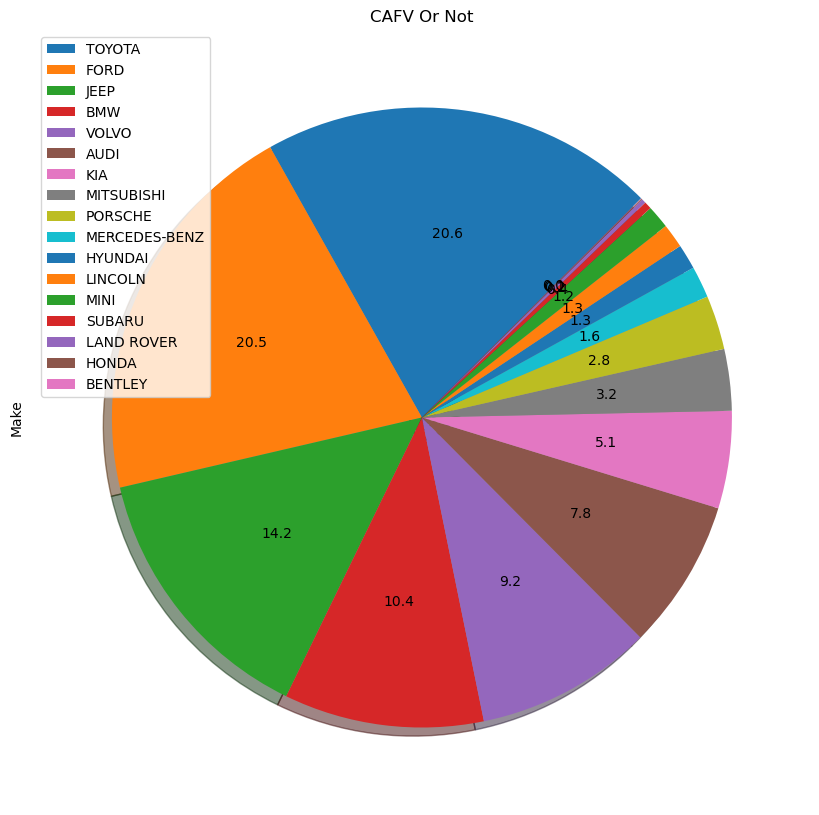

In [63]:
df_not_eli['Make'].value_counts().plot.pie(startangle=45, legend=True, shadow=True, title='CAFV Or Not', autopct='%.1f', figsize=(10,15), labels=None)

c:\Users\OmGusain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


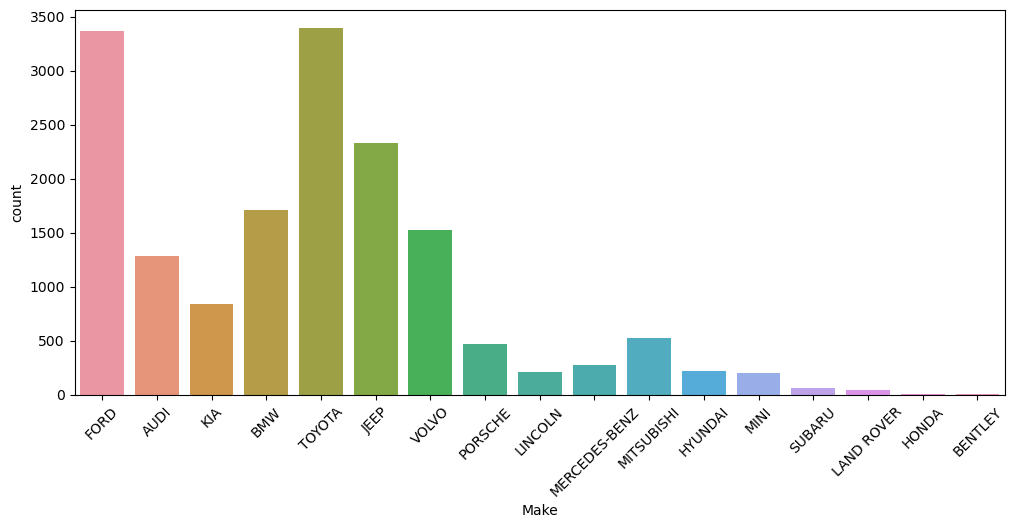

In [66]:
plt.figure(figsize=(12,5))
sns.countplot(df_not_eli['Make'])
plt.xticks(rotation=45)
plt.show()

##### Conclusion: We can see from the above plots and data that Toyota has the most number of cars that are Not CAFV Eligible, followed by FORD and JEEP respectively. Meanwhile, Bentley has the least number of cars that are not CAFV Eligible followed by Honda and Land Rover.

# 2) Get all TESLA cars with the model year, and model type made in Bothell City.

In [67]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


First, let's get all the Data of cars Made by Tesla in Bothell City

In [71]:
df[(df['Make']=="TESLA") & (df['City']=='Bothell')].head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
39,5YJ3E1EA6L,Snohomish,Bothell,WA,98012.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,21.0,127506886,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
217,5YJ3E1EB9N,King,Bothell,WA,98011.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,195097472,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
218,7SAYGDEEXN,Snohomish,Bothell,WA,98012.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,205456996,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
222,5YJ3E1EB6J,King,Bothell,WA,98011.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,200733662,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
292,5YJXCBE40H,King,Bothell,WA,98011.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,1.0,229900653,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [73]:
df_tesla = df[(df['Make']=="TESLA") & (df['City']=='Bothell')].reset_index(drop=True)

Now, let's get all the Tesla car models, year, and Type

In [75]:
df_tesla[['Make','Model', 'Model Year']]

,Make,Model,Model Year
0,TESLA,MODEL 3,2020
1,TESLA,MODEL 3,2022
2,TESLA,MODEL Y,2022
3,TESLA,MODEL 3,2018
4,TESLA,MODEL X,2017
...,...,...,...
2402,TESLA,MODEL 3,2019
2403,TESLA,MODEL 3,2021
2404,TESLA,MODEL S,2014
2405,TESLA,MODEL 3,2022


In [77]:
df_tesla[['Make','Model', 'Model Year']].value_counts()

Make   Model    Model Year
TESLA  MODEL Y  2022          400
                2023          362
                2021          313
       MODEL 3  2018          214
                2022          185
                2019          153
                2020          133
                2021          113
                2023          111
       MODEL Y  2020           72
       MODEL X  2018           35
                2022           32
       MODEL S  2018           29
       MODEL X  2020           26
       MODEL S  2015           26
       MODEL X  2023           25
       MODEL S  2017           23
                2016           22
       MODEL X  2017           22
       MODEL S  2022           21
       MODEL X  2019           19
       MODEL S  2014           15
       MODEL X  2016           14
       MODEL S  2013           12
                2021           11
                2020            8
       MODEL X  2021            3
       MODEL S  2023            3
                2019 

In [80]:
df_tesla['Model'].unique()

array(['MODEL 3', 'MODEL Y', 'MODEL X', 'MODEL S'], dtype=object)

In [81]:
df_tesla['Model Year'].unique()

array([2020, 2022, 2018, 2017, 2021, 2023, 2015, 2019, 2016, 2014, 2013,
       2012], dtype=int64)

Let's Try to see how many of each models were made in the Bothell city

c:\Users\OmGusain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='count'>

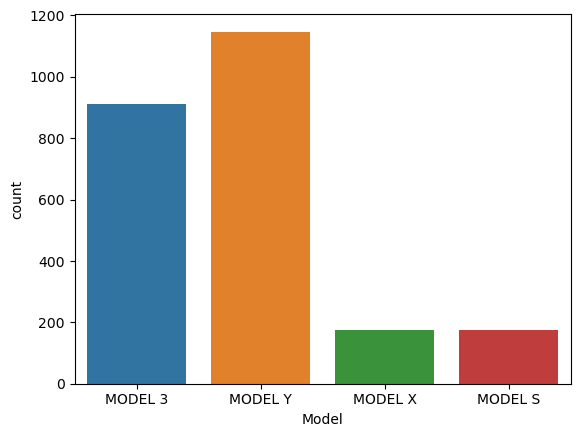

In [79]:
sns.countplot(df_tesla['Model'])

##### Model Y was made the most in Bothell city, Followed by Model 3, Model X and Model S respectively

Let's See Which year were the most car were made in Bothell

c:\Users\OmGusain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model Year', ylabel='count'>

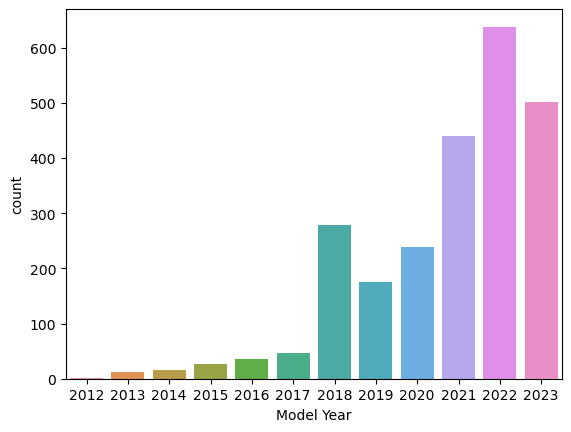

In [82]:
sns.countplot(df_tesla['Model Year'])

##### More than 600 Tesla Cars were made in Bothell City in 2022, making that year the highest among all other years for producing cars in Bothell City, followed by the year 2023, and 2021 respectively

# 3) Get all the cars that have an electric range of more than 100, and were made after 2015

In [83]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


Our goal is to get all the cars with Electric Range of more than 100 and made before 2015

In [85]:
df[(df['Electric Range']>100) & (df['Model Year']<2015)].head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
9,5YJSA1CP1D,Kitsap,Bremerton,WA,98312.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,26.0,164768075,POINT (-122.66122 47.56573),PUGET SOUND ENERGY INC,5.303508e+10
17,5YJSA1S18E,Thurston,Olympia,WA,98502.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,22.0,235148434,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
21,5YJSA1DN0D,Snohomish,Mill Creek,WA,98012.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,44.0,130615607,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306104e+10
24,5YJSA1DP5D,Skagit,Mount Vernon,WA,98273.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,40.0,228899387,POINT (-122.33897499999995 48.41333000000003),PUGET SOUND ENERGY INC,5.305795e+10
53,5YJSA1DPXD,Snohomish,Mill Creek,WA,98012.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,44.0,178261310,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10


Let's create a separate Dataframe for this


In [86]:
df_elec_year = df[(df['Electric Range']>100) & (df['Model Year']<2015)].reset_index(drop=True)

In [87]:
df_elec_year.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1CP1D,Kitsap,Bremerton,WA,98312.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,26.0,164768075,POINT (-122.66122 47.56573),PUGET SOUND ENERGY INC,5.303508e+10
1,5YJSA1S18E,Thurston,Olympia,WA,98502.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,22.0,235148434,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1DN0D,Snohomish,Mill Creek,WA,98012.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,44.0,130615607,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306104e+10
3,5YJSA1DP5D,Skagit,Mount Vernon,WA,98273.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,40.0,228899387,POINT (-122.33897499999995 48.41333000000003),PUGET SOUND ENERGY INC,5.305795e+10
4,5YJSA1DPXD,Snohomish,Mill Creek,WA,98012.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,44.0,178261310,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10


Now, let's just get all the Car names

In [89]:
df_elec_year[['Make', 'Model']].head()

,Make,Model
0,TESLA,MODEL S
1,TESLA,MODEL S
2,TESLA,MODEL S
3,TESLA,MODEL S
4,TESLA,MODEL S


Now, Just for our curiosity, we can try and plot various things for this. A few of them can be:

In [91]:
df_elec_year['Model'].value_counts()

MODEL S     1547
RAV4          56
ROADSTER      49
Name: Model, dtype: int64

c:\Users\OmGusain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='count'>

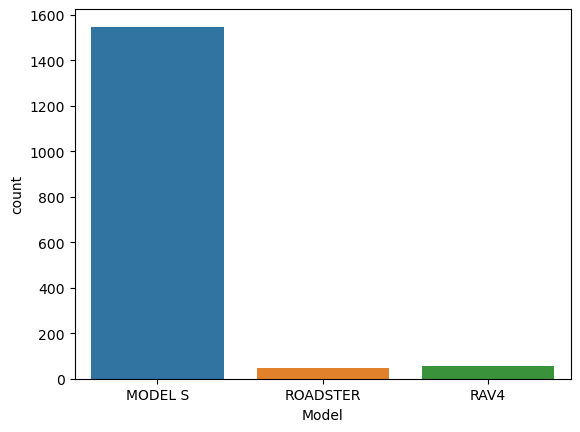

In [90]:
# To check the number of each model made 

sns.countplot(df_elec_year['Model'])

<AxesSubplot:xlabel='Model', ylabel='Electric Range'>

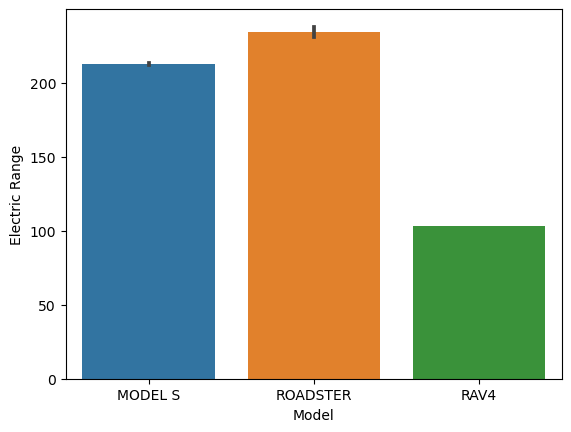

In [96]:
# We can also check which model has the highest electric range

sns.barplot(x='Model', y='Electric Range', data=df_elec_year)

In [97]:
df_elec_year['State'].unique()

array(['WA', 'CA', 'BC'], dtype=object)

c:\Users\OmGusain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='State', ylabel='count'>

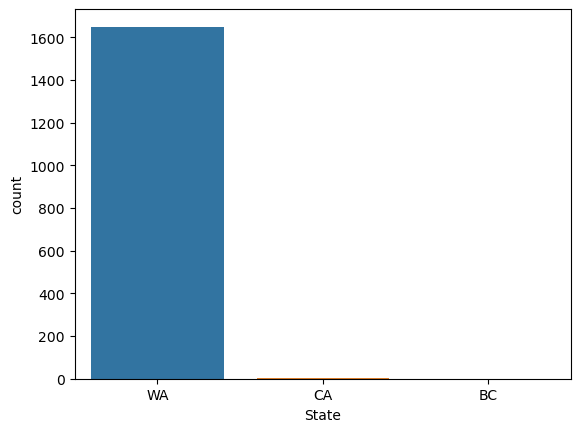

In [99]:
# We can also see which state produced the most cars in this data

sns.countplot(df_elec_year['State'])

# 4) Draw plots to show the distribution between city and electric vehicle type

In [104]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [102]:
df['City']

0                Yakima
1               Poulsbo
2               Seattle
3               Seattle
4                 Lacey
              ...      
130438       Gig Harbor
130439           Tacoma
130440          Seattle
130441    Camano Island
130442         Puyallup
Name: City, Length: 130443, dtype: object